## EX1
Preprocess this data set as in the course to make sure that you have a good datetime
column. Check it by plotting the Paris temperature column. If the plot looks nicely, that
means you did good.

In [4]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/time_series/paris_temperature.csv")

# Convert the 'datetime' column to datetime objects.  The errors='coerce' argument handles any invalid dates by setting them to NaT (Not a Time).
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Check for any invalid dates (NaT values)
invalid_dates = df[df['datetime'].isnull()]
if not invalid_dates.empty:
    print("Warning: Invalid dates found in the dataset:")
    print(invalid_dates)

# Save cleaned data to a CSV file
df.to_csv("cleaned_paris_temperature.csv", index=False)

# Display the DataFrame with the processed datetime column
print(df.head()) #Shows the first few rows to verify

           name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  Paris,France 2023-10-01     26.5     12.5  18.9          26.5   
1  Paris,France 2023-10-02     27.7     14.5  20.7          27.9   
2  Paris,France 2023-10-03     22.1     15.0  18.8          22.1   
3  Paris,France 2023-10-04     18.2     10.2  14.2          18.2   
4  Paris,France 2023-10-05     19.8     11.0  14.7          19.8   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          12.5       18.9  13.7      74.3  ...          3.5        3   
1          14.5       20.7  14.7      71.0  ...          4.4        4   
2          15.0       18.8  13.0      69.9  ...          4.8        4   
3          10.2       14.2   9.3      73.2  ...          5.1        4   
4          11.0       14.7   9.4      72.1  ...          3.5        3   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-10-01T07:49:34  2023-10-01T19:30:27       0.57   
1          1

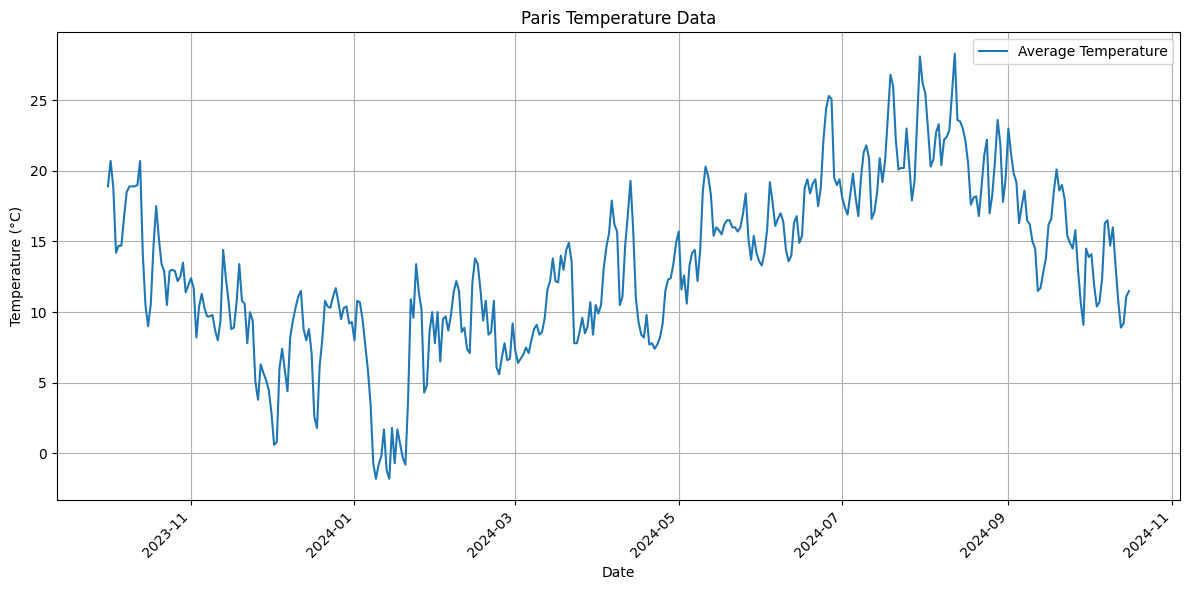

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_paris_temperature.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime']) #Remove rows with invalid dates


# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.plot(df['datetime'], df['temp'], label='Average Temperature', linestyle='-')


# Customize the plot
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Paris Temperature Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping


# Show the plot
plt.show()

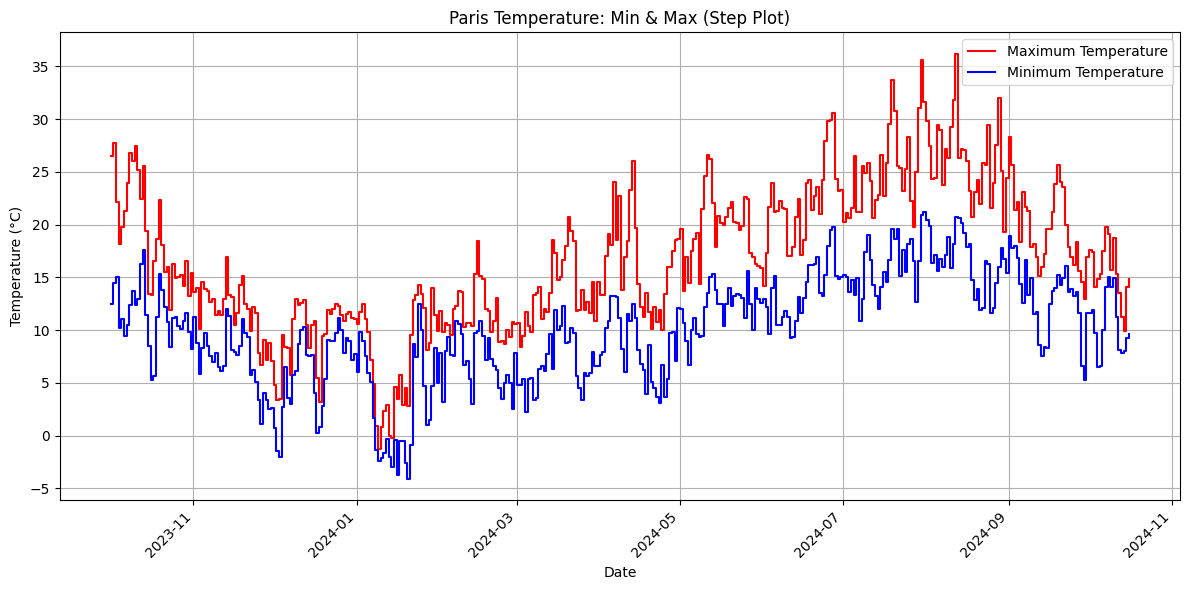

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("cleaned_paris_temperature.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime']) #Remove rows with invalid dates

# Create the step plot
plt.figure(figsize=(12, 6))
plt.step(df['datetime'], df['tempmax'], label='Maximum Temperature', where='post', color='red')
plt.step(df['datetime'], df['tempmin'], label='Minimum Temperature', where='post', color='blue')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Paris Temperature: Min & Max (Step Plot)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

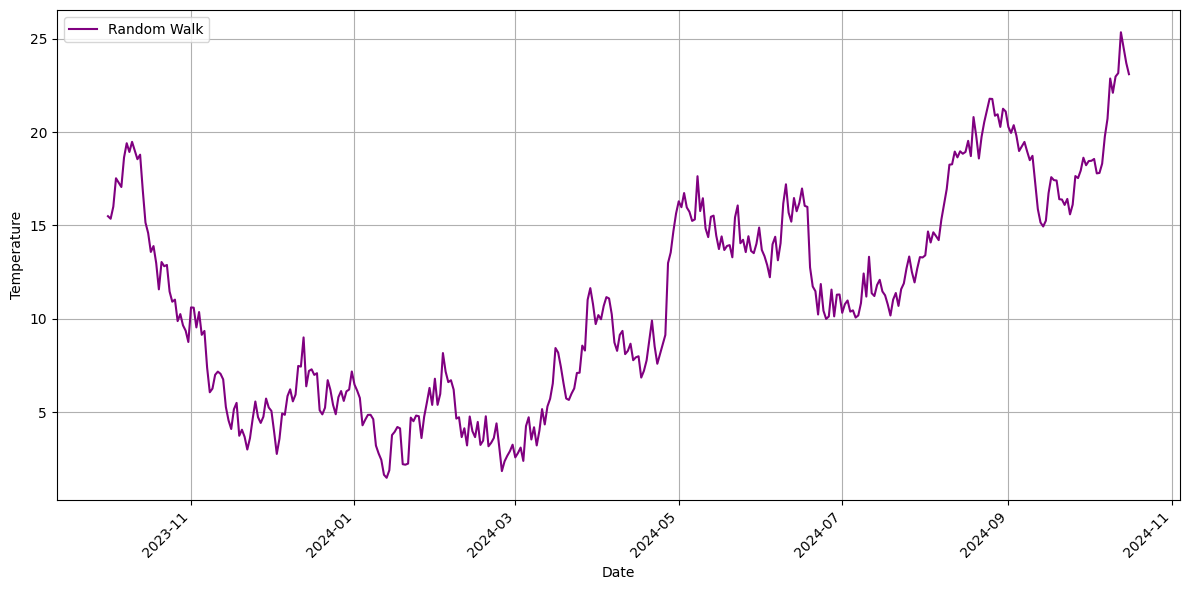

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("cleaned_paris_temperature.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])

# Generate a random walk
np.random.seed(42)  # for reproducibility
random_walk = np.cumsum(np.random.randn(len(df)))

# Plot only the random walk
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], random_walk + 15, label='Random Walk', linestyle='-', color='purple') #Added constant for better visualization


plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ex 2 & 3
2. The dataset has 33 columns (features). Explain the meaning and values in each column.

    For example, what does feature “moonphase” mean? What are its values?

3. Determine numerical features and categorical features.

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_paris_temperature.csv')

# Display the first few rows
print(df.head())

# Display the data types and non-null counts for each column
print(df.info())


           name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Paris,France  2023-10-01     26.5     12.5  18.9          26.5   
1  Paris,France  2023-10-02     27.7     14.5  20.7          27.9   
2  Paris,France  2023-10-03     22.1     15.0  18.8          22.1   
3  Paris,France  2023-10-04     18.2     10.2  14.2          18.2   
4  Paris,France  2023-10-05     19.8     11.0  14.7          19.8   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          12.5       18.9  13.7      74.3  ...          3.5        3   
1          14.5       20.7  14.7      71.0  ...          4.4        4   
2          15.0       18.8  13.0      69.9  ...          4.8        4   
3          10.2       14.2   9.3      73.2  ...          5.1        4   
4          11.0       14.7   9.4      72.1  ...          3.5        3   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-10-01T07:49:34  2023-10-01T19:30:27       0.57   
1     

In [18]:
# Identify numerical features (int64 and float64 data types)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Features:", numerical_features)

# Identify categorical features (object data type)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)


Numerical Features: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']
Categorical Features: ['name', 'datetime', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations']


In [19]:
# Display summary statistics for numerical features
print(df[numerical_features].describe())

          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  382.000000  382.000000  382.000000    382.000000    382.000000   
mean    16.802356   10.096859   13.279319     16.541623      8.974869   
std      6.840083    5.057506    5.819955      7.388110      6.197290   
min     -1.300000   -4.100000   -1.800000     -5.500000     -7.300000   
25%     11.800000    6.625000    9.300000     11.800000      4.600000   
50%     16.150000   10.200000   13.050000     16.150000     10.200000   
75%     21.850000   13.600000   17.575000     21.850000     13.600000   
max     36.200000   21.200000   28.300000     39.000000     21.200000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  382.000000  382.000000  382.000000  382.000000  382.000000  ...   
mean    12.624346    8.784293   76.118586    2.053552   71.432461  ...   
std      6.674208    4.779705   10.214621    3.939574   44.425978  ...   
min     -6.300000   -6.100000   51.600000    0

In [20]:
# Display unique values for categorical features to understand their categories
for col in categorical_features:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()


Unique values in 'name':
['Paris,France']

Unique values in 'datetime':
['2023-10-01' '2023-10-02' '2023-10-03' '2023-10-04' '2023-10-05'
 '2023-10-06' '2023-10-07' '2023-10-08' '2023-10-09' '2023-10-10'
 '2023-10-11' '2023-10-12' '2023-10-13' '2023-10-14' '2023-10-15'
 '2023-10-16' '2023-10-17' '2023-10-18' '2023-10-19' '2023-10-20'
 '2023-10-21' '2023-10-22' '2023-10-23' '2023-10-24' '2023-10-25'
 '2023-10-26' '2023-10-27' '2023-10-28' '2023-10-29' '2023-10-30'
 '2023-10-31' '2023-11-01' '2023-11-02' '2023-11-03' '2023-11-04'
 '2023-11-05' '2023-11-06' '2023-11-07' '2023-11-08' '2023-11-09'
 '2023-11-10' '2023-11-11' '2023-11-12' '2023-11-13' '2023-11-14'
 '2023-11-15' '2023-11-16' '2023-11-17' '2023-11-18' '2023-11-19'
 '2023-11-20' '2023-11-21' '2023-11-22' '2023-11-23' '2023-11-24'
 '2023-11-25' '2023-11-26' '2023-11-27' '2023-11-28' '2023-11-29'
 '2023-11-30' '2023-12-01' '2023-12-02' '2023-12-03' '2023-12-04'
 '2023-12-05' '2023-12-06' '2023-12-07' '2023-12-08' '2023-12-09'
 '20

# **Ex4**:
a. Applying SARIMA model (p,d,q)(P,D,Q)m. Determine the differencing order. Find
the best possible parameters (p,d,q) (P,D,Q), m in terms of AIC metrics and Root Mean Squared Error (RMSE) (on testset). Present the result clearly with AIC, Loglikelihood, BIC, RMSE, R2, MAPE for the best model.

b. Use Prophet model and do the same task. Try different setting for Prophet to get the best result.

In [ ]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Load data
data4 = pd.read_csv('/content/drive/MyDrive/time_series/paris_temperature.csv')

In [ ]:
data4 = data4[['temp']]  # Focus on the main temperature column for forecasting
data4 = data4.dropna()

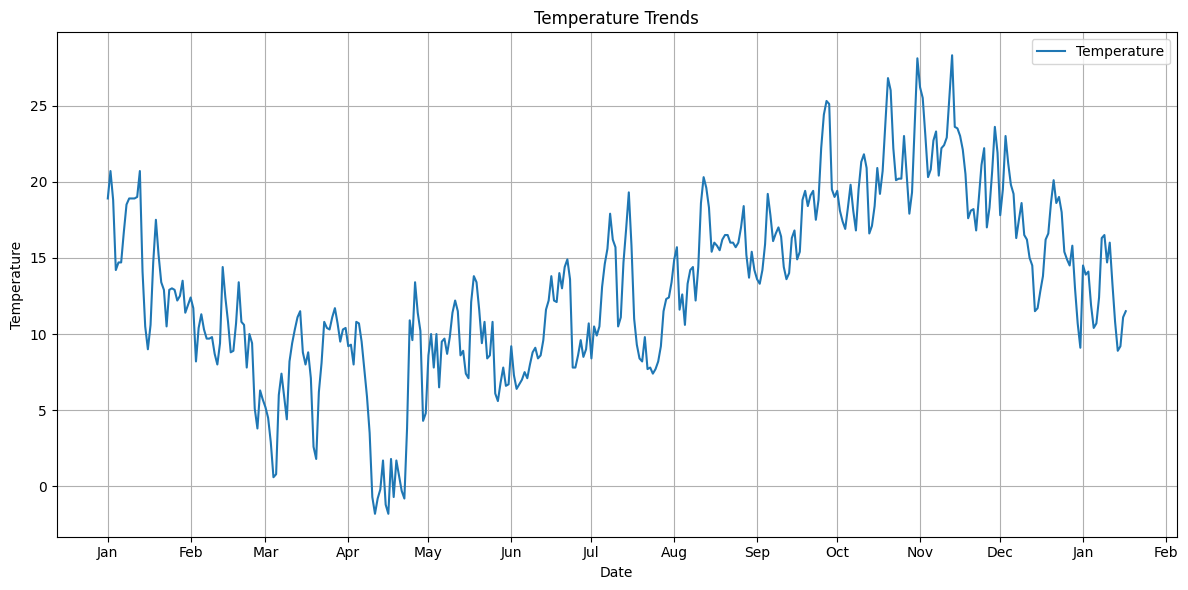

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


plt.figure(figsize=(12, 6))
plt.plot(data4.index, data4['temp'], label="Temperature")

# Set x-axis major locator to month and formatter to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trends")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ensure that the index is in datetime format
data4.index = pd.to_datetime(data4.index)

# Resample data to monthly frequency and take the mean for each month
data_monthly = data4.resample('M').mean()

# Reset the index to make the date column available as a regular column
data_monthly.reset_index(inplace=True)

# Display the first two rows to verify
data_monthly.head(10)


<ipython-input-13-f59b3500a7fe>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data4.resample('M').mean()


,index,temp
0,1970-01-31,13.279319


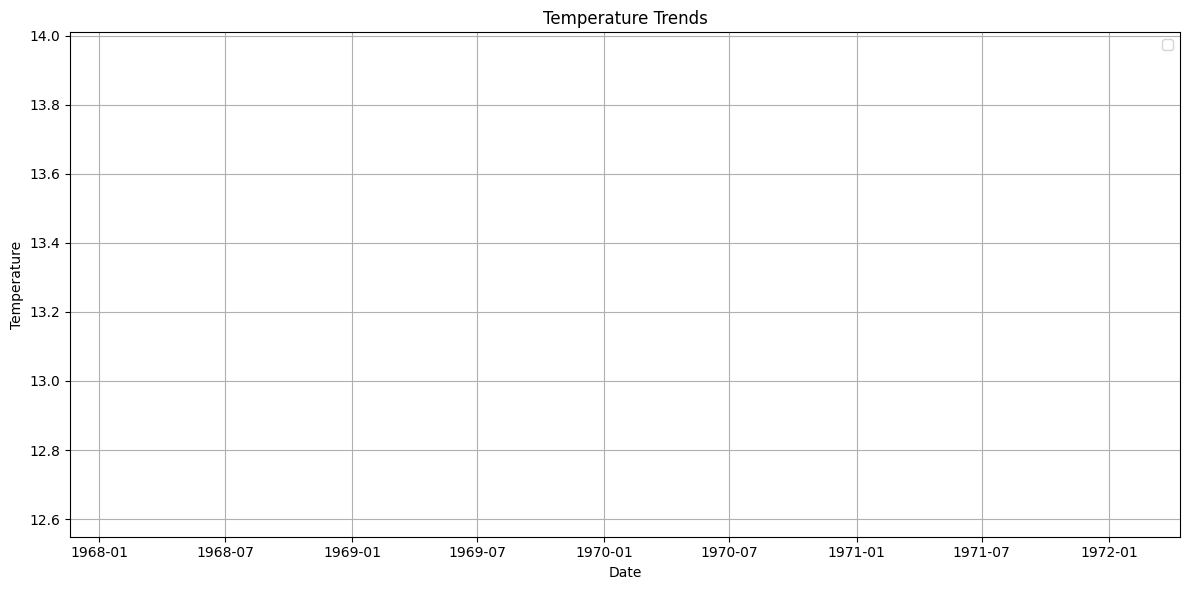

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_monthly['index'],data_monthly['temp'], color='tab:red')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trends")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_fuller(timeseries):
    print ('Dickey-Fuller Test indicates:')
    df_test = adfuller(timeseries, regression='ct', autolag='AIC')
    output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(output)

print(ad_fuller(data4['temp']))

Dickey-Fuller Test indicates:
Test Statistic                  -3.473427
p-value                          0.042323
#Lags Used                       3.000000
Number of Observations Used    378.000000
dtype: float64
None


The p-value is 0.042323, which is below the commonly used threshold of 0.05. This means we can reject the null hypothesis of the Dickey-Fuller test, suggesting that the time series is stationary at a 5% significance level.

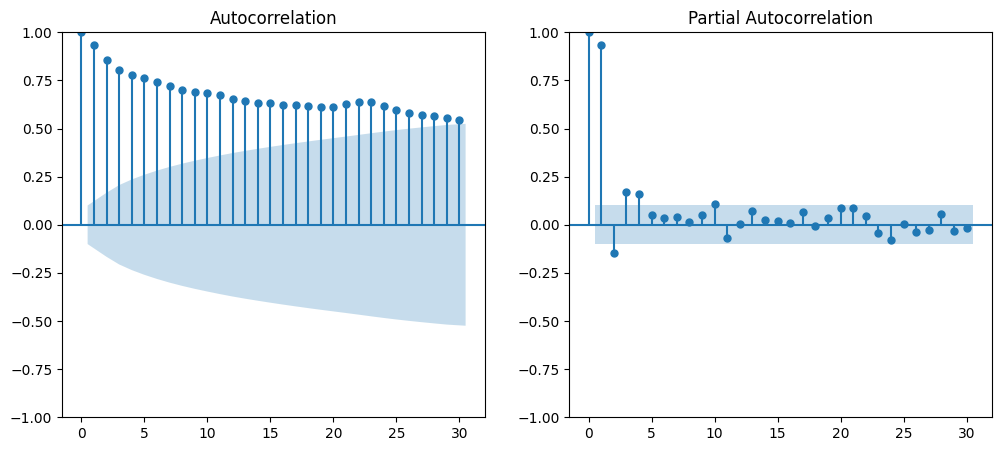

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(data4['temp'].dropna(), lags=30, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(data4['temp'].dropna(), lags=30, ax=plt.gca())
plt.show()


Based on the ACF and PACF patterns:

- p (AR term): Since there is a significant spike at lag 1 in the PACF, a value of p=1 might be appropriate.
- d (Differencing term): Based on the earlier Dickey-Fuller test and ACF plot, we could experiment with d=1 to address any non-stationarity, despite the mixed signals. However, the Dickey-Fuller test result suggests d=0 may be adequate.
- q (MA term): The ACF plot’s gradual decay hints at a moving average process but not necessarily high order. Testing q=1 or 2 could be beneficial.

In [ ]:
import itertools
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


features_to_model = ['temp']

# Define ranges for p, d, q, and seasonal components
p_values = range(0, 3)
q_values = range(0, 3)
d_value = 1  # Assumed after stationarity check
seasonal_p_values = range(0, 2)
seasonal_q_values = range(0, 2)
seasonal_d_value = 1
seasonal_period = 12  # Assuming monthly seasonality

# Set train size as 80% of the data
train = data4['2023-10-01':'2024-09-15']
test = data4['2024-09-16':]

# Dictionary to store best models and their parameters for each feature
best_models = {}

for feature in features_to_model:
    print(f"\nEvaluating SARIMAX models for {feature.capitalize()}:")

    best_aic = float("inf")
    best_bic = float("inf")
    best_rmse = float("inf")
    best_mae = float("inf")
    best_order = None
    best_seasonal_order = None
    best_model = None

    # Loop over combinations of p, d, q, and seasonal components
    for p, q, sp, sq in itertools.product(p_values, q_values, seasonal_p_values, seasonal_q_values):
        try:
            # Define the SARIMAX model
            model = sm.tsa.statespace.SARIMAX(
                train,  # Train on the training set
                order=(p, d_value, q),
                seasonal_order=(sp, seasonal_d_value, sq, seasonal_period),
                enforce_stationarity=False,
                enforce_invertibility=False
            )

            # Fit the model
            result = model.fit(disp=False)

            # Calculate metrics on the test set
            predictions = result.predict(start=test.index[0], end=test.index[-1])
            aic = result.aic
            bic = result.bic
            rmse = np.sqrt(mean_squared_error(test, predictions))
            mae = mean_absolute_error(test, predictions)

            print(f"SARIMAX({p},{d_value},{q}) x ({sp},{seasonal_d_value},{sq},{seasonal_period}) - AIC: {aic}, BIC: {bic}, RMSE: {rmse}, MAE: {mae}")

            # Update best model based on a chosen criterion (e.g., AIC here, but can be BIC, RMSE, etc.)
            if aic < best_aic:
                best_aic = aic
                best_bic = bic
                best_rmse = rmse
                best_mae = mae
                best_order = (p, d_value, q)
                best_seasonal_order = (sp, seasonal_d_value, sq, seasonal_period)
                best_model = result

        except Exception as e:
            print(f"SARIMAX({p},{d_value},{q}) x ({sp},{seasonal_d_value},{sq},{seasonal_period}) failed: {e}")
            continue

    best_models[feature] = {
        "model": best_model,
        "order": best_order,
        "seasonal_order": best_seasonal_order,
        "aic": best_aic,
        "bic": best_bic,
        "rmse": best_rmse,
        "mae": best_mae
    }

    print(f"\nBest SARIMAX model for {feature.capitalize()} - Order: {best_order}, Seasonal Order: {best_seasonal_order}")
    print(f"AIC: {best_aic}, BIC: {best_bic}, RMSE: {best_rmse}, MAE: {best_mae}")


Evaluating SARIMAX models for Temp:
SARIMAX(0,1,0) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,0) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fail

SARIMAX(0,1,0) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,0) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,1) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

SARIMAX(0,1,1) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,1) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args)

SARIMAX(0,1,1) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,2) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,2) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(0,1,2) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(0,1,2) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,0) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,0) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,0) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/p

SARIMAX(1,1,0) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,1) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,1) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

SARIMAX(1,1,1) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,1) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(1,1,2) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,2) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(1,1,2) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(1,1,2) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,0) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,0) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/p

SARIMAX(2,1,0) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,0) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(2,1,1) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,1) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(2,1,1) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,1) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(2,1,2) x (0,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,2) x (0,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

SARIMAX(2,1,2) x (1,1,0,12) failed: index 0 is out of bounds for axis 0 with size 0
SARIMAX(2,1,2) x (1,1,1,12) failed: index 0 is out of bounds for axis 0 with size 0

Best SARIMAX model for Temp - Order: None, Seasonal Order: None
AIC: inf, BIC: inf, RMSE: inf, MAE: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data' is the DataFrame with cleaned datetime and temp columns
# Ensure the data is sorted by datetime before model fitting
data4.sort_index(inplace=True)

# Define the SARIMAX model (p=1, d=1, q=2)(P=0, D=1, Q=1, m=12)
model = sm.tsa.statespace.SARIMAX(train['temp'],
                                  order=(1, 1, 2),
                                  seasonal_order=(0, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

# Fit the model
result = model.fit(disp=False)

# Make predictions
predictions = result.predict(start=test.index[0], end=test.index[-1])

# Calculate evaluation metrics (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(predictions.index, predictions, label='SARIMA Predictions', color='red', linestyle='--')
plt.title("Temperature Prediction with SARIMA Model")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate evaluation metrics
aic = result.aic
bic = result.bic
log_likelihood = result.llf
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)
mape = mean_absolute_percentage_error(test, predictions)

# Display results
print(f"Model Evaluation Metrics:")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")
print(f"Log-Likelihood: {log_likelihood:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")

The results imply that this SARIMA model is not a good fit for the data. The negative R² score and high MAPE indicate that the model is struggling to capture patterns in the temperature data. This could be due to:

- Poor choice of parameters (p, d, q, P, D, Q, m): It’s possible that the SARIMA parameters aren’t optimal, leading to poor fit.
- Data characteristics: The temperature data might have complex patterns or nonlinear trends that SARIMA struggles to capture.

In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet

# Prepare data for Prophet
train_prophet = train.reset_index().rename(columns={'datetime': 'ds', 'temp': 'y'})
test_prophet = test.reset_index().rename(columns={'datetime': 'ds', 'temp': 'y'})

# Initialize Prophet model with default parameters
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Fit the model
model.fit(train_prophet)

# Make future dataframe for test period
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# Extract predictions for the test set
forecast_test = forecast.set_index('ds').loc[test.index, 'yhat']

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test['temp'], forecast_test))
r2 = r2_score(test['temp'], forecast_test)
mape = mean_absolute_percentage_error(test['temp'], forecast_test) * 100  # MAPE in %
print(f"-----------------------------------------------")

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Additional metrics from the Prophet model
aic = model.params['aic'] if 'aic' in model.params else 'N/A'  # Prophet doesn't provide AIC, so this is placeholder
log_likelihood = 'N/A'  # Prophet does not calculate log-likelihood directly

print(f"AIC: {aic}")
print(f"Log-Likelihood: {log_likelihood}")

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['temp'], label='Train', color='blue')
plt.plot(test.index, test['temp'], label='Actual (Test)', color='orange')
plt.plot(test.index, forecast_test, label='Prophet Prediction', color='green')
plt.title("Prophet Model Prediction vs Actual Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Lack of AIC and Log-Likelihood:
- AIC and Log-Likelihood are not available in Prophet because it uses a Bayesian approach rather than maximum likelihood estimation, which is common in time-series models like SARIMA. This makes direct model comparison using these metrics impossible.

The Prophet model is not performing as well as expected for this dataset. The negative R² and high RMSE indicate that the model is not capturing the trend or seasonality adequately, possibly due to the nature of the dataset or limitations in the Prophet model’s assumptions.

# **Ex5**:
Choose and apply a Probabilistic Machine Learning model (Linear Regression, LightGBM Regressor, XGBoost Regressor) on these trainset and testset.

Out-Of-Sample split for the dataset = Split randomly 80-20 your dataset, Do not respect the evolution in time of your time series.

Hyper-parameter tuning as hard as you could (with Optuna or Grid Search) to get the best result.

Compute with RMSE. R2. MAPE metrics.


**In this part, I would love to use 3 models are : Linear Regression, LightGBM Regressor, XGBoost Regressor to compare and indicate the most suitable one.**




**Import and install things**

In [1]:
!pip install optuna
!pip install lightgbm
!pip install xgboost

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import optuna  # Optional for hyperparameter tuning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Due to our ignorance on the time series in this session, I will preprocess one more time to be ready to use with models.**

In [10]:
df_cleaned = pd.read_csv('cleaned_paris_temperature.csv')
df_cleaned = df_cleaned.drop(columns=['datetime'])
df_cleaned = df_cleaned.drop(columns=['name'])

# Drop unnecessary columns that won’t be used for modeling
columns_to_drop = ['sunrise', 'sunset', 'description', 'icon', 'stations']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Drop non-numeric columns or encode them if needed
# For simplicity, let's drop columns like 'preciptype' and 'conditions'
df_cleaned = df_cleaned.drop(columns=['preciptype', 'conditions'], errors='ignore')

#Split the data

# Define features and target
target = 'temp'  # Define the target column
features = [col for col in df_cleaned.columns if col != target]

# Ensure all features are numeric
X = df_cleaned[features].select_dtypes(include=['number'])
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm data is ready for modeling by checking the structure
print(X.head())
print("Feature Data Types:\n", X.dtypes)
print("Target:\n", y.head())



   tempmax  tempmin  feelslikemax  feelslikemin  feelslike   dew  humidity  \
0     26.5     12.5          26.5          12.5       18.9  13.7      74.3   
1     27.7     14.5          27.9          14.5       20.7  14.7      71.0   
2     22.1     15.0          22.1          15.0       18.8  13.0      69.9   
3     18.2     10.2          18.2          10.2       14.2   9.3      73.2   
4     19.8     11.0          19.8          11.0       14.7   9.4      72.1   

   precip  precipprob  precipcover  ...  windspeed  winddir  sealevelpressure  \
0   0.144       100.0         4.17  ...       11.3    170.2            1023.7   
1   0.000         0.0         0.00  ...       12.0    173.7            1018.8   
2   0.386       100.0        12.50  ...       22.8    277.2            1020.5   
3   0.006       100.0         4.17  ...       12.3    260.9            1029.8   
4   0.014       100.0         4.17  ...        6.8    238.3            1027.3   

   cloudcover  visibility  solarradiation  s

**Apply PML**

In [11]:
# Instantiate models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor()
}

# Initialize an empty list to store results
results_table = []

# Train each model and store results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Append the results as a dictionary
    results_table.append({
        "Model": name,
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
        "R2": r2_score(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred)
    })



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 305, number of used features: 20
[LightGBM] [Info] Start training from score 13.571803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Result**

In [12]:
# Convert results list to a DataFrame for easy viewing
results_table_df = pd.DataFrame(results_table)

# Display the results DataFrame
print(results_table_df)

                Model      RMSE        R2      MAPE
0   Linear Regression  0.210359  0.998636  0.036542
1   XGBoost Regressor  0.362972  0.995939  0.072973
2  LightGBM Regressor  0.748531  0.982731  0.109577


**Hyper-parameter tuning for LightGBM and XGBoost**

In [13]:
# Initialize an empty list to collect results
results_list = []

### LightGBM with GridSearchCV
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
grid_search_lgbm = GridSearchCV(LGBMRegressor(), param_grid_lgbm, cv=3, scoring='neg_root_mean_squared_error')
grid_search_lgbm.fit(X_train, y_train)
best_model_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm = best_model_lgbm.predict(X_test)

# Collect results for LightGBM with GridSearchCV
results_list.append({
    "Model": "LightGBM",
    "Tuning_Method": "GridSearchCV",
    "RMSE": mean_squared_error(y_test, y_pred_lgbm, squared=False),
    "R2": r2_score(y_test, y_pred_lgbm),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_lgbm)
})

### XGBoost with Optuna
def objective(trial):
    param = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300)
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred, squared=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best model from Optuna
best_model_xgb = XGBRegressor(**study.best_params)
best_model_xgb.fit(X_train, y_train)
y_pred_xgb = best_model_xgb.predict(X_test)

# Collect results for XGBoost with Optuna
results_list.append({
    "Model": "XGBoost",
    "Tuning_Method": "Optuna",
    "RMSE": mean_squared_error(y_test, y_pred_xgb, squared=False),
    "R2": r2_score(y_test, y_pred_xgb),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_xgb)
})


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 203, number of used features: 20
[LightGBM] [Info] Start training from score 13.577340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-17 10:21:53,857] A new study created in memory with name: no-name-7afdd8d4-f2dc-4c66-96b3-828cd15a1b0e


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-13-8b06c57cc105>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-17 10:21:54,406] Trial 0 finished with value: 0.323138518974132 and parameters: {'learning_rate': 0.05555536944796918, 'max_depth': 6, 'n_estimators': 216}. Best is trial 0 with value: 0.323138518974132.
<ipython-input-13-8b06c57cc105>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_

**Result after tuning**

In [14]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results_list)

# Display the comparison results
print(results_table_df)
print('After tuning')
print(results_df)

                Model      RMSE        R2      MAPE
0   Linear Regression  0.210359  0.998636  0.036542
1   XGBoost Regressor  0.362972  0.995939  0.072973
2  LightGBM Regressor  0.748531  0.982731  0.109577
After tuning
      Model Tuning_Method      RMSE        R2      MAPE
0  LightGBM  GridSearchCV  0.748531  0.982731  0.109577
1   XGBoost        Optuna  0.257392  0.997958  0.059574


# **Ex6:**
In Question 5, normally you will make use of numerical features only. A bonus
point will be given to a team which can leverage categorical feature nicely to improve
the model performance.

**Preprocess one more time to fit with the Ex6's condition**


In [15]:
from sklearn.preprocessing import OneHotEncoder
df_ex6 = pd.read_csv('cleaned_paris_temperature.csv')
# Drop unnecessary columns
columns_to_drop = ['name', 'datetime', 'sunrise', 'sunset', 'description', 'stations']
df_ex6 = df_ex6.drop(columns=columns_to_drop, errors='ignore')

# One-Hot Encode categorical columns
categorical_cols = ['preciptype', 'conditions', 'icon']
df_ex6 = pd.get_dummies(df_ex6, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

#Split data
# Define features and target
target = 'temp'
X = df_ex6.drop(columns=[target])
y = df_ex6[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train and evaluate the most suitable model from ex5 : Linear Regression**

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Result
print("Results with Categorical Features:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

Results with Categorical Features:
RMSE: 0.21979911052196086
R2: 0.9985110165484008
MAPE: 0.04122688614204268


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Train and evaluate the second most suitable model from ex5 : XGBoost**

In [ ]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Result
print("Results with Categorical Features using XGBoost:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

# **Ex7: LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('cleaned_paris_temperature.csv')
data_cleaned = df.drop(columns=['preciptype', 'stations'])
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'])

data_values = data_cleaned['temp'].values

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned[['temp']])

In [ ]:
train_end_date = '2024-09-15'
test_start_date = '2024-09-16'

In [ ]:
train_data = data_scaled[data_cleaned['datetime'] <= train_end_date]
test_data = data_scaled[(data_cleaned['datetime'] >= test_start_date)]

In [ ]:
def create_sequences(data_value, sequences_length):
    X, y = [], []
    for i in range(len(data_value) - sequences_length):
        X.append(data_value[i:i+sequences_length, 0])
        y.append(data_value[i+sequences_length, 0])
    return np.array(X), np.array(y)

In [ ]:
sequences_length = 14
X_train, y_train = create_sequences(train_data, sequences_length)
X_test, y_test = create_sequences(test_data, sequences_length)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_189 (LSTM)                      │ (None, 14, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_190 (LSTM)                      │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1491
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0252
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0171
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0167
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0130
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0124
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0131
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0125
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0114
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122
Epoch 12/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133
Epoch 13/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102
Epoch 14/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106
Epoch 15/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

In [ ]:
test_predict = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


In [ ]:
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = y_test.reshape(test_predict.shape[0], -1)

In [ ]:
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
score_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print('RMSE: {}'.format(score_rmse))

RMSE: 370.4108408802396
